In [3]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import pandas as pd
import fiona
%matplotlib inline
import matplotlib.pyplot as plt
ox.config(log_console=True, use_cache=True)
from collections import Counter

#### Ввод координат ограничивающего прямоугольника (bbox) для необходимой территории

In [4]:
#bbox for Moscow
#north, south, east, west = 55.8776, 55.5884, 37.8067, 37.4167

##bbox for mitino
#north, south, east, west = 55.87050, 55.81752, 37.40628, 37.32652

##bbox for kotlovka
north, south, east, west = 55.69253, 55.62938, 37.63996, 37.54570

#### Загрузка сети автомобильных дорог и служебных (в пределах промзон) из Openstreetmap

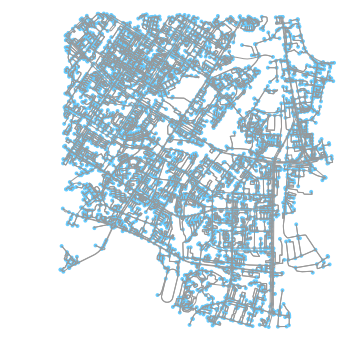

In [5]:
G_c = ox.graph_from_bbox(north, south, east, west, network_type='drive_service')
G_c = ox.project_graph(G_c)
fig, ax = ox.plot_graph(G_c)

#### Экспорт графа дорог в качестве изображения и shp-файла

In [6]:
fig.savefig('moscow_graph.png',format='png',dpi=300)
ox.save_graph_shapefile(G_c, filename='network-kotlovka')

#### Выгрузка базовой статистики по всему по графу, оценка графа

In [7]:
ox.basic_stats(G_c)

{'circuity_avg': 1.4155790338812811e-05,
 'clean_intersection_count': None,
 'clean_intersection_density_km': None,
 'edge_density_km': None,
 'edge_length_avg': 79.91998347106082,
 'edge_length_total': 984534.2763799982,
 'intersection_count': 4086,
 'intersection_density_km': None,
 'k_avg': 4.533210671573137,
 'm': 12319,
 'n': 5435,
 'node_density_km': None,
 'self_loop_proportion': 0.007224612387369105,
 'street_density_km': None,
 'street_length_avg': 82.71190406019959,
 'street_length_total': 576336.5474914707,
 'street_segments_count': 6968,
 'streets_per_node_avg': 2.571113155473781,
 'streets_per_node_counts': {0: 0, 1: 1349, 2: 11, 3: 3711, 4: 350, 5: 14},
 'streets_per_node_proportion': {0: 0.0,
  1: 0.24820607175712972,
  2: 0.0020239190432382705,
  3: 0.6827966881324747,
  4: 0.06439742410303588,
  5: 0.0025758969641214353}}

#### Структура строки для узла и ребра УДС

In [11]:
list(G_c.nodes(data=True))[50:52]

[(148905458,
  {'highway': 'traffic_signals',
   'lat': 55.6915945,
   'lon': 37.5615167,
   'osmid': '148905458',
   'x': 409575.2813582194,
   'y': 6172693.457927778}),
 (153179154,
  {'highway': nan,
   'lat': 55.6856101,
   'lon': 37.5542452,
   'osmid': '153179154',
   'x': 409104.33914927556,
   'y': 6172037.026070317})]

In [16]:
list(G_c.edges(keys=True, data=True))[0:2]

[(60465147,
  321997153,
  0,
  {'highway': 'secondary',
   'length': 168.781341793765,
   'name': 'Севастопольский проспект',
   'oneway': True,
   'osmid': 243626175}),
 (60465147,
  690981721,
  0,
  {'geometry': <shapely.geometry.linestring.LineString at 0x11d2485c0>,
   'highway': 'tertiary',
   'length': 43.644310738550715,
   'name': 'Перекопская улица',
   'oneway': False,
   'osmid': 154326168})]

#### Вычисление показателей центральности (центральность по близости, центральность по промежуточности)

In [17]:
stats = ox.basic_stats(G_c)
extended_stats = ox.extended_stats(G_c, ecc=True, bc=True, cc=True)
for key, value in extended_stats.items():
    stats[key] = value
pd.Series(stats)

avg_neighbor_degree                    {60465147: 2.0, 60471946: 2.0, 60471969: 1.5, ...
avg_neighbor_degree_avg                                                          2.57486
avg_weighted_neighbor_degree           {60465147: 0.018830117513192014, 60471946: 0.0...
avg_weighted_neighbor_degree_avg                                               0.0518988
betweenness_centrality                 {60465147: 0.07276502245181243, 60471946: 0.04...
betweenness_centrality_avg                                                    0.00728552
center                                                                      [2990065727]
circuity_avg                                                                 1.41558e-05
clean_intersection_count                                                            None
clean_intersection_density_km                                                       None
closeness_centrality                   {60465147: 0.0002881160860326605, 60471946: 0....
closeness_centrality_

In [22]:
graph_stat = pd.DataFrame(pd.Series(stats)).T

In [28]:
graphstat = pd.DataFrame()
graphstat = graphstat.append(pd.DataFrame(data = graph_stat), ignore_index=True)

In [29]:
graphstat.to_csv('graphstat.csv')

In [ ]:
bb = ox.stats.extended_stats(G_c, connectivity=True, ecc=False, bc=True, cc=True)

In [ ]:
nx.set_node_attributes(G_c, 'clsnss_centrality',  bb['closeness_centrality'])
nx.set_node_attributes(G_c, 'btwnss_centrality',  bb['betweenness_centrality'])
nx.set_node_attributes(G_c, 'dgr_centrality',  bb['degree_centrality'])

ox.save_graph_shapefile(G_c, filename='network-msc_kotlovka')